In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from  matplotlib.ticker import PercentFormatter
import seaborn as sns
from IPython.display import Image, display

In [2]:
#Set Option
pd.set_option('max_colwidth', -1)
pd.set_option('display.max_rows', -1)
pd.set_option('display.max_columns', -1)
pd.set_option('display.width', -1)
sns.set_theme()

In [12]:
df = pd.read_csv('Data/Worldometer_4_21.csv', index_col = 0)

In [13]:
df.head(3)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
#,,,,,,,,,,,,,,,,,
1,China,90541,21.0,4636,NaN,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776,15897.0,310467.0,9.0
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810,10.0,570.0,1.0
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395,87.0,7532.0,5.0


In [25]:
df[df['Population'] == ' ']

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
#,,,,,,,,,,,,,,,,,
195,Diamond Princess,712,NaN,13,NaN,699,NaN,0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
217,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN


In [67]:
df = df.fillna(0)

In [68]:
df.dtypes

Country,Other          object
TotalCases              int64
NewCases              float64
TotalDeaths            object
NewDeaths             float64
TotalRecovered          int64
NewRecovered          float64
ActiveCases             int64
Serious,Critical      float64
Tot Cases/1M pop      float64
Deaths/1M pop         float64
TotalTests            float64
Tests/1M pop          float64
Population             object
1 Caseevery X ppl     float64
1 Deathevery X ppl    float64
1 Testevery X ppl     float64
dtype: object

In [32]:
cols = ['TotalCases','NewCases', 'TotalDeaths', 'NewDeaths','TotalRecovered']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


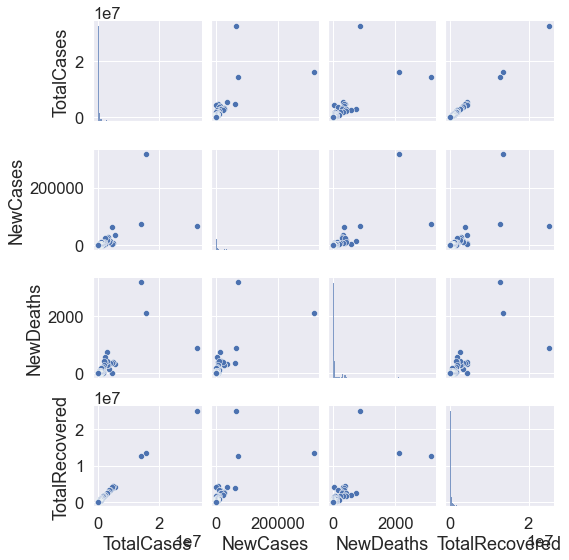

In [33]:
sns.pairplot(df[cols], size=2.0)

In [64]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 1 to 221
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country,Other       221 non-null    object 
 1   TotalCases          221 non-null    int64  
 2   NewCases            180 non-null    float64
 3   TotalDeaths         221 non-null    object 
 4   NewDeaths           123 non-null    float64
 5   TotalRecovered      221 non-null    int64  
 6   NewRecovered        159 non-null    float64
 7   ActiveCases         221 non-null    int64  
 8   Serious,Critical    148 non-null    float64
 9   Tot Cases/1M pop    219 non-null    float64
 10  Deaths/1M pop       205 non-null    float64
 11  TotalTests          210 non-null    float64
 12  Tests/1M pop        210 non-null    float64
 13  Population          221 non-null    object 
 14  1 Caseevery X ppl   219 non-null    float64
 15  1 Deathevery X ppl  205 non-null    float64
 16  1 Testev

In [43]:
df.select_dtypes(exclude='object').iloc[:,range(0,7)].values.shape

(221, 7)

In [65]:
# cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
ttt = df.select_dtypes(exclude='object').copy()
ttt = ttt.fillna(0).values
X_std = stdsc.fit_transform(ttt)

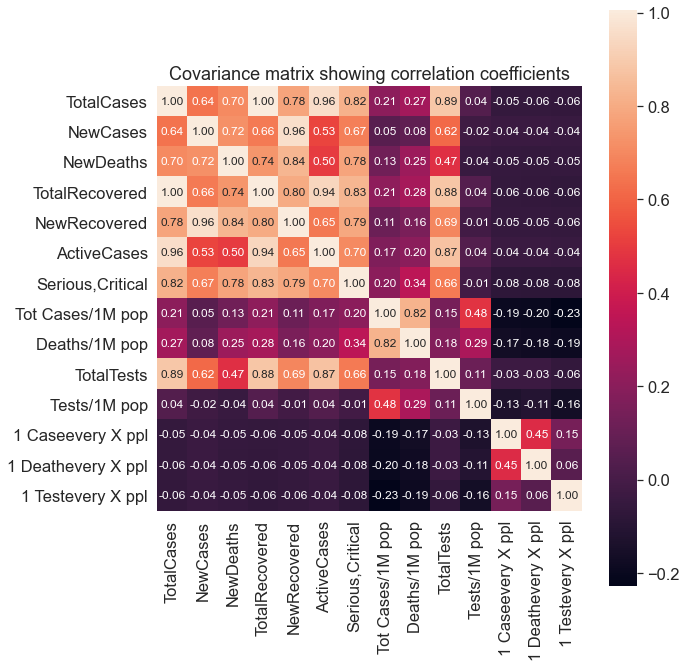

In [66]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=df.select_dtypes(exclude='object').columns,
                 xticklabels=df.select_dtypes(exclude='object').columns)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

- Choose 3 features that correlates strongly with each other.
- Choose 6 features and cross visualization 


- BAr chart
- Grouped BAr Chart
- Scatter 
- Heat map
- Area
- Line
- Stack Bar